In [87]:
%run init.ipynb

# Visibilidade vs coerência no interferômetro de Mach-Zehnder generalizado
Vamos considerar um IMZ com um divisor de feixes geral com coeficientes de transmissão e reflexão $T$ e $R$, respectivamente, com $T^{2}+R^{2}=1$ pois $T^{2}$ é a probabilidade do quanton ser transmitido. Vamos para as contas
\begin{align}
|0\rangle & \xrightarrow[]{DFG_{1}} T_{1}|0\rangle + iR_{1}|1\rangle =: |\psi_{0}\rangle, \\
|\psi_{0}\rangle & \xrightarrow[]{E_{1},E_{2}} iT_{1}|1\rangle + iiR_{1}|0\rangle =: |\psi_{1}\rangle, \\
|\psi_{1}\rangle & \xrightarrow[]{\phi} e^{i\phi}iT_{1}|1\rangle - R_{1}|0\rangle =: |\psi_{2}\rangle, \\
|\psi_{2}\rangle & \xrightarrow[]{DFG_{2}} ie^{i\phi}T_{1}\big(T_{2}|1\rangle+iR_{2}|0\rangle\big) - R_{1}\big(T_{2}|0\rangle+iR_{2}|1\rangle\big) \\
& = -\big(e^{i\phi}T_{1}R_{2}+R_{1}T_{2}\big)|0\rangle + i\big(e^{i\phi}T_{1}T_{2}-R_{1}R_{2}\big) \\
& =: |\psi_{3}\rangle.
\end{align}

Quanto às __probabilidades__, teremos
\begin{align}
Pr(0) & = \big|-\big(e^{i\phi}T_{1}R_{2}+R_{1}T_{2}\big)\big|^{2} = \big(e^{i\phi}T_{1}R_{2}+R_{1}T_{2}\big)\big(e^{-i\phi}T_{1}R_{2}+R_{1}T_{2}\big) \\
& = T_{1}^{2}R_{2}^{2} + R_{1}^{2}T_{2}^{2} + T_{1}R_{1}T_{2}R_{2}\big(e^{i\phi}+e^{-i\phi}\big) \\
& = T_{1}^{2}R_{2}^{2} + R_{1}^{2}T_{2}^{2} + 2T_{1}R_{1}T_{2}R_{2}\cos\phi, \\
Pr(1) & = \big|i\big(e^{i\phi}T_{1}T_{2}-R_{1}R_{2}\big)\big|^{2} = \big(e^{i\phi}T_{1}T_{2}-R_{1}R_{2}\big)\big(e^{-i\phi}T_{1}T_{2}-R_{1}R_{2}\big) \\
& = T_{1}^{2}T_{2}^{2} + R_{1}^{2}R_{2}^{2} - T_{1}R_{1}T_{2}R_{2}\big(e^{i\phi}+e^{-i\phi}\big) \\
& = T_{1}^{2}T_{2}^{2} + R_{1}^{2}R_{2}^{2} - 2T_{1}R_{1}T_{2}R_{2}\cos\phi.
\end{align}

__Exercício:__ Verifique que $Pr(1)=1-Pr(0).$

In [86]:
def plot_Pr0(R1, R2):
    matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
    ph_max = 2*math.pi; dph = ph_max/20; ph = np.arange(0, ph_max+dph, dph)
    dimph = ph.shape[0]; P0 = np.zeros(dimph)
    T1 = math.sqrt(1 - R1**2); T2 = math.sqrt(1 - R2**2)
    P0 = T1**2*R2**2 + R1**2*T2**2 + 2*T1*R1*T2*R2*np.cos(ph)
    plt.plot(ph, P0); plt.xlabel(r'$\phi$'); plt.ylabel(r'$Pr(0)$')
    plt.xlim(0, 2*math.pi); plt.ylim(0, 1)
    plt.annotate(r'$R_{1}=$'+str(R1), xy=(0.5,0.5), xytext=(0.5,0.5), fontsize=12)
    plt.annotate(r'$R_{2}=$'+str(R1), xy=(0.5,0.4), xytext=(0.5,0.4), fontsize=12)
    plt.show()   
interactive(plot_Pr0, R1 = (0, 1, 0.05), R2 = (0, 1, 0.05))

interactive(children=(FloatSlider(value=0.0, description='R1', max=1.0, step=0.05), FloatSlider(value=0.0, des…

Com relação às __visibilidades__, como $0\le T_{1},R_{1},T_{2},R_{2}\le 1$, começamos notando que
\begin{align}
Pr(0)_{\max} & = T_{1}^{2}R_{2}^{2} + R_{1}^{2}T_{2}^{2} + 2T_{1}R_{1}T_{2}R_{2}\max_{\phi}\cos\phi \\
& = T_{1}^{2}R_{2}^{2} + R_{1}^{2}T_{2}^{2} + 2T_{1}R_{1}T_{2}R_{2}, \\
Pr(0)_{\min} & = T_{1}^{2}R_{2}^{2} + R_{1}^{2}T_{2}^{2} + 2T_{1}R_{1}T_{2}R_{2}\min_{\phi}\cos\phi \\
& = T_{1}^{2}R_{2}^{2} + R_{1}^{2}T_{2}^{2} - 2T_{1}R_{1}T_{2}R_{2}, \\
Pr(1)_{\max} & = T_{1}^{2}T_{2}^{2} + R_{1}^{2}R_{2}^{2} - 2T_{1}R_{1}T_{2}R_{2}\min_{\phi}\cos\phi \\
& = T_{1}^{2}T_{2}^{2} + R_{1}^{2}R_{2}^{2} + 2T_{1}R_{1}T_{2}R_{2}, \\
Pr(1)_{\min} & = T_{1}^{2}T_{2}^{2} + R_{1}^{2}R_{2}^{2} - 2T_{1}R_{1}T_{2}R_{2}\max_{\phi}\cos\phi \\
& = T_{1}^{2}T_{2}^{2} + R_{1}^{2}R_{2}^{2} - 2T_{1}R_{1}T_{2}R_{2}.
\end{align}
Assim
\begin{align}
V_{0} & = \frac{Pr(0)_{\max}-Pr(0)_{\min}}{Pr(0)_{\max}+Pr(0)_{\min}} = \frac{2T_{1}R_{1}T_{2}R_{2}}{T_{1}^{2}R_{2}^{2} + R_{1}^{2}T_{2}^{2}}, \\
V_{1} & = \frac{Pr(1)_{\max}-Pr(1)_{\min}}{Pr(1)_{\max}+Pr(1)_{\min}} = \frac{2T_{1}R_{1}T_{2}R_{2}}{T_{1}^{2}T_{2}^{2} + R_{1}^{2}R_{2}^{2}}.
\end{align}
Essas duas expressões para a visibilidade interferométrica são, em geral, diferentes.

In [72]:
def V1(T1, T2):
    return (2*T1*T2*np.sqrt(1-T1**2)*np.sqrt(1-T2**2))/((T1**2)*(T2**2) + (1-T1**2)*(1-T2**2))
def V_3d(th, ph):
    x = np.linspace(0.00001, 0.99999, 20); y = np.linspace(0.00001, 0.99999, 20); X, Y = np.meshgrid(x, y)
    Z = V1(X, Y); fig = plt.figure(); 
    ax = plt.axes(projection = "3d"); ax.plot_wireframe(X, Y, Z, color = 'blue')
    ax.set_xlabel(r'$T_{1}$'); ax.set_ylabel(r'$T_{2}$'); ax.set_zlabel(r'$V_{0}$')
    ax.view_init(th, ph); fig.tight_layout(); plt.show()
interactive(V_3d, th = (0,90,10), ph = (0,360,10))

interactive(children=(IntSlider(value=40, description='th', max=90, step=10), IntSlider(value=180, description…

In [73]:
from mpl_toolkits import mplot3d
def V0(T1, T2):
    return (2*T1*T2*np.sqrt(1-T1**2)*np.sqrt(1-T2**2))/((T1**2)*(1-T2**2) + (1-T1**2)*T2**2)
def V_3d(th, ph):
    x = np.linspace(0.00001, 0.99999, 20); y = np.linspace(0.00001, 0.99999, 20); X, Y = np.meshgrid(x, y)
    Z = V0(X, Y); fig = plt.figure(); 
    ax = plt.axes(projection = "3d"); ax.plot_wireframe(X, Y, Z, color = 'blue')
    ax.set_xlabel(r'$T_{1}$'); ax.set_ylabel(r'$T_{2}$'); ax.set_zlabel(r'$V_{0}$')
    ax.view_init(th, ph); fig.tight_layout(); plt.show()
interactive(V_3d, th = (0,90,10), ph = (0,360,10))

interactive(children=(IntSlider(value=40, description='th', max=90, step=10), IntSlider(value=180, description…

In [74]:
def V_3d(th, ph):
    x = np.linspace(0.00001, 0.99999, 20); y = np.linspace(0.00001, 0.99999, 20); X, Y = np.meshgrid(x, y)
    Z = V0(X, Y)-V1(X, Y); fig = plt.figure(); 
    ax = plt.axes(projection = "3d"); ax.plot_wireframe(X, Y, Z, color = 'blue')
    ax.set_xlabel(r'$T_{1}$'); ax.set_ylabel(r'$T_{2}$'); ax.set_zlabel(r'$V_{0}-V_{1}$')
    ax.view_init(th, ph); fig.tight_layout(); plt.show()
interactive(V_3d, th = (0,90,10), ph = (0,360,10))

interactive(children=(IntSlider(value=40, description='th', max=90, step=10), IntSlider(value=180, description…

In [16]:
import math
import qiskit

In [22]:
def shannon_num(pv):
    d = pv.shape[0]; SE = 0.0; j = -1
    while (j < d-1):
        j = j + 1
        if pv[j] > 10**-15 and pv[j] < (1.0-10**-15):
            SE -= pv[j]*math.log2(pv[j])
    return SE

In [23]:
import scipy.linalg.lapack as lapak
def von_neumann_num(rho):
    d = rho.shape[0]; b = lapak.zheevd(rho)
    return shannon_num(b[0])

In [24]:
def coh_re_num(rho):
    d = rho.shape[0]; pv = np.zeros(d)
    for j in range(0,d):
        pv[j] = rho[j,j].real
    return shannon_num(pv) - von_neumann_num(rho)

In [25]:
def P_vn_num(rho):
    d = rho.shape[0]; P = 0
    for j in range(0, d):
        if rho[j,j] > 10**-15 and rho[j,j] < (1.0-10**-15):
            P += np.absolute(rho[j,j])*math.log2(np.absolute(rho[j,j]))
    return math.log2(d) + P

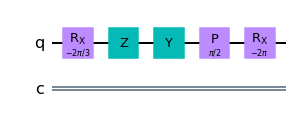

In [20]:
def qc_gmzi(th, ph, ga):
    qc = qiskit.QuantumCircuit(1)
    qc.rx(-2*th, 0); qc.z(0); qc.y(0); qc.p(ph, 0); qc.rx(-2*ga, 0)
    return qc
th, ph, ga = math.pi/3, math.pi/2, math.pi; qcgmzi = qc_gmzi(th, ph, ga); qcgmzi.draw(output = 'mpl')

In [38]:
nshots = 8192
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_armonk')
simulator = qiskit.Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

ibmqfactory.load_account:WARNING:2022-03-29 11:09:18,364: Credentials are already in use. The existing account in the session will be replaced.


In [44]:
# for error mitigation
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
qr = qiskit.QuantumRegister(1)
qubit_list = [0] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job = qiskit.execute(meas_calibs, backend = device, shots = nshots); job_monitor(job)
cal_results = job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

Job Status: job has successfully run


In [45]:
# for computing coherence and predictability
th_max = math.pi/2; dth = th_max/10; th = np.arange(0, th_max+dth, dth); dimth = th.shape[0]
Csim = np.zeros(dimth); Psim = np.zeros(dimth); Cexp = np.zeros(dimth); Pexp = np.zeros(dimth)
for j in range(0, dimth):
    qr = qiskit.QuantumRegister(1); qc = qiskit.QuantumCircuit(qr); qc.rx(-2*th[j], qr[0])
    qstc = state_tomography_circuits(qc, qr[0])
    job = qiskit.execute(qstc, simulator, shots = nshots) # simulation
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method = 'lstsq')
    Csim[j] = coh_re_num(rho); Psim[j] = P_vn_num(rho)
    jobE = qiskit.execute(qstc, backend = device, shots = nshots); job_monitor(jobE)
    mitigated_results = meas_fitter.filter.apply(jobE.result())
    qstfE = StateTomographyFitter(mitigated_results, qstc)
    #qstfE = StateTomographyFitter(jobE.result(), qstc)
    rhoE = qstfE.fit(method = 'lstsq')
    Cexp[j] = coh_re_num(rhoE); Pexp[j] = P_vn_num(rhoE)

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [47]:
Cexp

array([7.70115763e-03, 1.57380886e-01, 4.40540792e-01, 7.03349898e-01,
       9.08742255e-01, 9.99108562e-01, 9.44028574e-01, 7.58127448e-01,
       5.03568498e-01, 1.48176718e-01, 9.53925297e-04])

In [48]:
Pexp

array([9.92298842e-01, 8.42619114e-01, 5.59459208e-01, 2.96650102e-01,
       9.12577447e-02, 8.91438237e-04, 5.59714258e-02, 2.41872552e-01,
       4.96431502e-01, 7.35376639e-01, 9.13560707e-01])

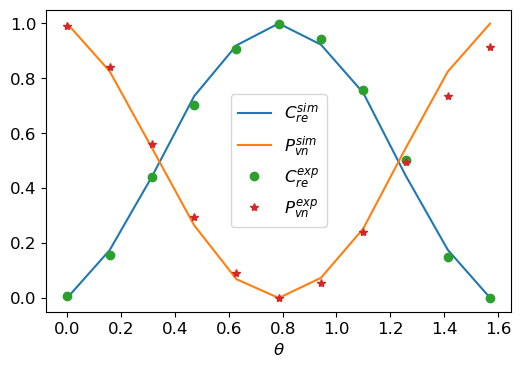

In [46]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(th, Csim, label = r'$C_{re}^{sim}$')
plt.plot(th, Psim, label = r'$P_{vn}^{sim}$')
plt.plot(th, Cexp, 'o', label = r'$C_{re}^{exp}$')
plt.plot(th, Pexp, '*', label = r'$P_{vn}^{exp}$')
plt.legend(); plt.xlabel(r'$\theta$')
plt.savefig('coh_vs_ivi_armonk_mit.pdf', format = 'pdf', dpi = 200)
plt.show()

In [121]:
# for computing the visibility
ph_max = 2*math.pi; dph = ph_max/10; ph = np.arange(0, ph_max+dph, dph); dimph = ph.shape[0]
P0sim = np.zeros(dimph); P0exp = np.zeros(dimph)
th[j] = math.pi/2
for k in range(0, dimph):
    qr = qiskit.QuantumRegister(1); cr = qiskit.ClassicalRegister(1); qc = qiskit.QuantumCircuit(qr, cr)
    qc.rx(-2*th[j], qr[0]); qc.z(qr[0]); qc.y(qr[0]) 
    qc.p(ph[k], qr[0]); ga = th[j]; qc.rx(-2*ga, qr[0]); qc.measure(qr[0], cr[0])
    job = qiskit.execute(qc, backend = simulator, shots = nshots) # simulation
    counts = job.result().get_counts(qc)
    if '0' in counts:
        P0sim[k] = counts['0']
    jobE = qiskit.execute(qc, backend = device, shots = nshots); job_monitor(jobE)
    mitigated_results = meas_fitter.filter.apply(jobE.result())
    countsE = mitigated_results.get_counts(qc)
    #countsE = jobE.result().get_counts(qc)
    if '0' in countsE:
        P0exp[k] = countsE['0']
P0sim = P0sim/nshots; P0exp = P0exp/nshots

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [122]:
P0exp

array([0.0267666 , 0.02431936, 0.02646069, 0.03701438, 0.02340165,
       0.02997859, 0.02095442, 0.02049556, 0.02156623, 0.01957785,
       0.03242582])

In [123]:
P0sim

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [125]:
P0expthpi2 = np.array([0.0267666 , 0.02431936, 0.02646069, 0.03701438, 0.02340165,
       0.02997859, 0.02095442, 0.02049556, 0.02156623, 0.01957785,
       0.03242582])
P0simthpi2 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [119]:
P0expthpi4 = np.array([1.        , 0.90838173, 0.66274091, 0.37488527, 0.11976134,
       0.01881309, 0.12251453, 0.36310798, 0.65050474, 0.90455797,
       1.        ])
P0simthpi4 = np.array([1.        , 0.90612793, 0.65258789, 0.34069824, 0.09924316,
       0.        , 0.09228516, 0.34741211, 0.64331055, 0.90209961,
       1.        ])

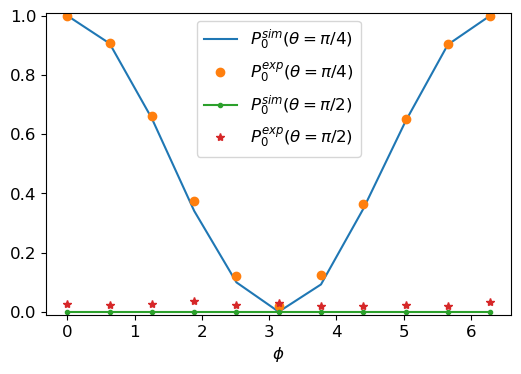

In [128]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(ph, P0simthpi4, label = r'$P_{0}^{sim}(\theta=\pi/4)$')
plt.plot(ph, P0expthpi4, 'o', label = r'$P_{0}^{exp}(\theta=\pi/4)$')
plt.plot(ph, P0simthpi2, '.-', label = r'$P_{0}^{sim}(\theta=\pi/2)$')
plt.plot(ph, P0expthpi2, '*', label = r'$P_{0}^{exp}(\theta=\pi/2)$')
plt.ylim(0, 2*math.pi); plt.ylim(-0.01, 1.01)
plt.legend(); plt.xlabel(r'$\phi$')
plt.savefig('P0_thpi4_armonk_mit.pdf', format = 'pdf', dpi = 200)
plt.show()